In [3]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('credit_card_fraud_dataset.csv')

In [5]:
df = df.drop('TransactionDate', axis=1)

In [6]:
X = df.drop(columns=['IsFraud'])
y = df['IsFraud']

# Detect and encode categorical variables
X = pd.get_dummies(df.drop(columns=['IsFraud']), columns=['TransactionType', 'Location'], drop_first=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.4)

In [10]:
train_preds = lof.fit_predict(X_train_scaled)
test_preds = lof.fit_predict(X_test_scaled)

In [14]:
preds = lof.fit_predict(X_train_scaled)
predicted = [1 if x == -1 else 0 for x in preds]

In [11]:
train_predicted = [1 if x == -1 else 0 for x in train_preds]
test_predicted = [1 if x == -1 else 0 for x in test_preds]


🔍 Training vs Testing Evaluation Metrics
               Training       Testing
Accuracy       0.597886      0.597667
Precision      0.009857      0.009583
Recall         0.394286      0.383333
F1 Score       0.019233      0.018699
TP           276.000000    115.000000
FP         27724.000000  11885.000000
FN           424.000000    185.000000
TN         41576.000000  17815.000000


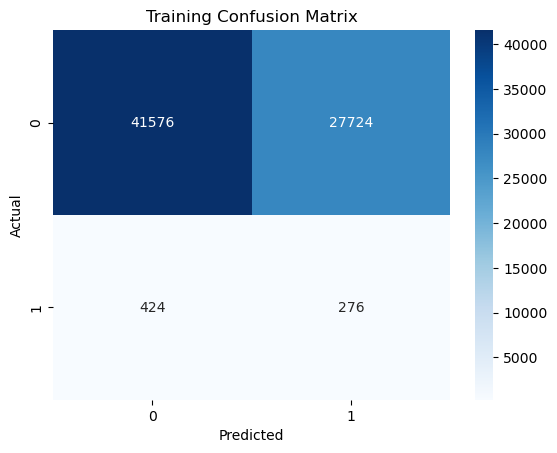

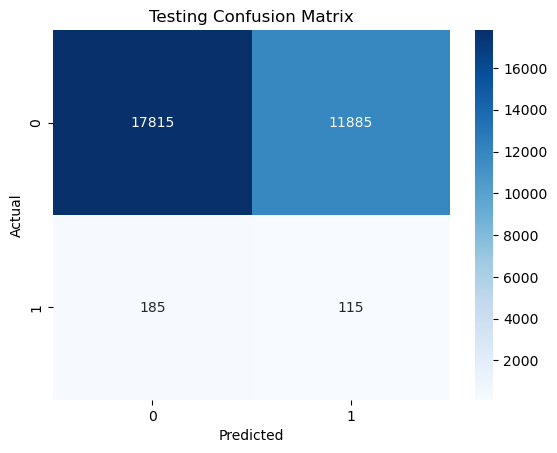

In [13]:
def compute_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1 Score': f1_score(y_true, y_pred, zero_division=0),
        'TP': tp,
        'FP': fp,
        'FN': fn,
        'TN': tn
    }

# Calculate metrics for training and testing predictions
train_metrics = compute_metrics(y_train, train_predicted)
test_metrics = compute_metrics(y_test, test_predicted)

# Create a DataFrame to compare training vs testing metrics
comparison_df = pd.DataFrame({
    'Training': train_metrics,
    'Testing': test_metrics
})

# Display comparison
print("\n🔍 Training vs Testing Evaluation Metrics")
print(comparison_df)

# Function to plot confusion matrix
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot confusion matrices for training and testing sets
plot_confusion(y_train, train_predicted, "Training Confusion Matrix")
plot_confusion(y_test, test_predicted, "Testing Confusion Matrix")